# Arithmetic Operations on Images

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [34]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y))

[[255]]


In [35]:
print (x+y)

[4]


In [23]:
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('OpenCV_Logo.jpg')

In [24]:
img1 = cv2.resize(img1, dsize=(640, 480))
img2 = cv2.resize(img2, dsize=(640, 480))

In [25]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
def nothing(x):
    pass

In [27]:
cv2.namedWindow('image')
cv2.createTrackbar('weight', 'image', 0, 255, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    weight = cv2.getTrackbarPos('weight', 'image')
    dst = cv2.addWeighted(img1, weight/255, img2, 1-weight/255, 0)
    cv2.imshow('image',dst)
    
cv2.destroyAllWindows()

In [54]:
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('image2.jpg')

In [55]:
def pltImage(img):    
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show

In [56]:
img1 = cv2.resize(img1, dsize=(640, 480))
img2 = cv2.resize(img2, dsize=(640, 480))

In [57]:
rows,cols,channels = img1.shape
roi = img1[0:rows, 0:cols]

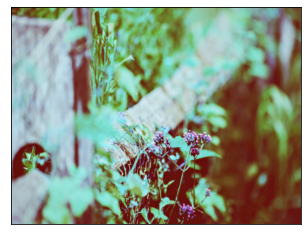

In [58]:
pltImage(roi)

In [ ]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

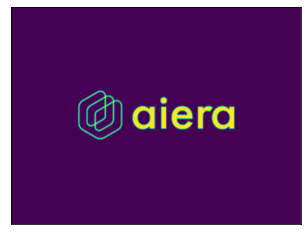

In [62]:
pltImage(img2gray)

In [65]:
ret, mask = cv2.threshold(img2gray,
                          10, 
                          255, 
                          cv2.THRESH_BINARY)

In [66]:
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI

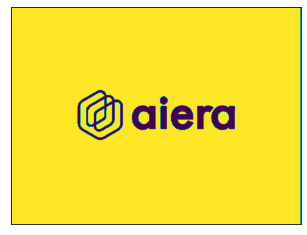

In [67]:
pltImage(mask_inv)

In [68]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

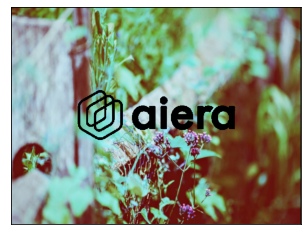

In [69]:
pltImage(img1_bg)

In [71]:
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

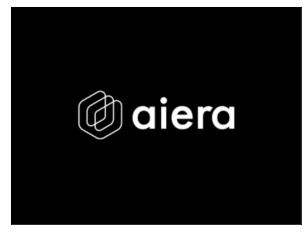

In [72]:
pltImage(img2_fg)

In [73]:
dst = cv2.add(img1_bg,img2_fg)

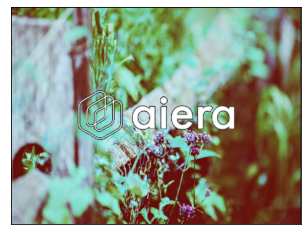

In [74]:
pltImage(dst)

In [75]:
img1[0:rows, 0:cols ] = dst

In [76]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

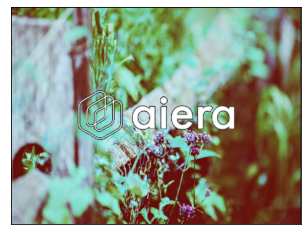

In [77]:
pltImage(img1)